In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
import matplotlib.pyplot as plt  
import seaborn as sns

In [5]:
from numpy import mean
from numpy import std

In [6]:
df= pd.read_csv('HyperTuning_preprocessed_data(final)1.csv', encoding= 'unicode_escape') 

In [7]:
df.head(5)

,Unnamed: 0,HR-0.0,HR-1.0,HR-2.0,HR-3.0,HR-4.0,HR-5.0,HR-6.0,HR-7.0,HR-8.0,...,HTAG-3.0,HTAG-4.0,HTAG-5.0,HTHG-0.0,HTHG-1.0,HTHG-2.0,HTHG-3.0,HTHG-4.0,HTHG-5.0,FTR
0,4452,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1,7305,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
2,3574,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,6640,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
4,636,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


In [8]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [9]:
df.head(5)

,HR-0.0,HR-1.0,HR-2.0,HR-3.0,HR-4.0,HR-5.0,HR-6.0,HR-7.0,HR-8.0,HR-9.0,...,HTAG-3.0,HTAG-4.0,HTAG-5.0,HTHG-0.0,HTHG-1.0,HTHG-2.0,HTHG-3.0,HTHG-4.0,HTHG-5.0,FTR
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


In [10]:
X3 = df.drop(['FTR'], axis=1)
X3 = X3.astype('int64')
X3 = X3.values

In [11]:
Y3 = df['FTR']
Y3 = Y3.values

In [12]:
print(X3.shape)
print(Y3.shape)

(9000, 6113)
(9000,)


In [13]:
x3train, x3test, y3train, y3test = train_test_split(X3,Y3, test_size = 0.2, random_state=1)

### RF 

In [17]:
clf = RandomForestClassifier() 

In [13]:
#Fitting the data
clf.fit(x3train, y3train)
# Now get the score using score method
print('The score on FTHG TEST DATA') 
print(clf.score(x3test, y3test))
y_pred = clf.predict(x3test)

The score on FTHG TEST DATA
0.87


In [14]:
# getting the classfication report
print(classification_report(y3test, y_pred))
cm = confusion_matrix(y3test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       610
           1       0.89      0.86      0.88       591
           2       0.82      0.85      0.84       599

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800



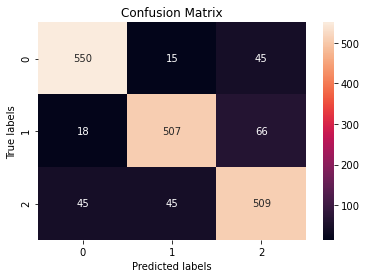

In [15]:
# potting graphical confusion matrix on the test data with heat map
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.show()

In [ ]:
#Prediction models (NB, RF, SVM, DT)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

models = []
models.append(('RF', RandomForestClassifier()))
#models.append(('SVM', SVC(C = 100, gamma = 0.01)))

results = []
resultsavg = []
names = []
resultsstd = []

for name, model in models:
    cv_results = cross_val_score(model, X3, Y3, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    resultsavg.append(cv_results.mean())
    resultsstd.append(cv_results.std())
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [16]:
#Grid Search
# define search space
space = dict()
space['n_estimators'] = [90, 100, 110, 120]
#space['max_features'] = [6, 10]
# define search (clf = Random Forest Classifier)
search = GridSearchCV(clf, space, scoring='accuracy', cv=5, refit=True)
# execute search
result = search.fit(x3train, y3train)
# get the best performing model fit on the whole training set
best_model = result.best_estimator_

In [17]:
# evaluate model on the hold out dataset
yhat = best_model.predict(x3test)
# evaluate the model
acc = accuracy_score(y3test, yhat)
print(acc)
print(classification_report(y3test, yhat))

0.8777777777777778
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       610
           1       0.90      0.87      0.88       591
           2       0.85      0.85      0.85       599

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800



In [18]:
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))

>acc=0.878, est=0.835, cfg={'n_estimators': 120}


In [19]:
print('The score on FTR TEST DATA') 
print(best_model.score(x3test, y3test))

The score on FTR TEST DATA
0.8777777777777778


In [14]:
n_estimators = [100,120,150]
#max_features = [2, 4,6]
#max_depth = np.arange(1,10)
#n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
#max_features = ['auto', 'sqrt']
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#max_depth = [2,4]
#min_samples_leaf = [1, 2, 4]
#min_samples_split = [1,2]
#bootstrap = [True, False]

In [15]:
params={
        'n_estimators': n_estimators,
        #'max_features': max_features,
        #'max_depth': max_depth,
        #'min_samples_split': min_samples_split,
        #'min_samples_leaf': min_samples_leaf,
        #'min_samples_split': min_samples_split,
        #'min_samples_leaf': min_samples_leaf,
        #'bootstrap': bootstrap
       }

In [18]:
#Grid Search (clf = Random Forest Classifier)
grid_cv = GridSearchCV(clf, param_grid=params, cv=5, verbose=2) 

In [19]:
#random_search.fit(X3, Y3)
grid_cv.fit(x3train, y3train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...................................n_estimators=100; total time=  18.4s
[CV] END ...................................n_estimators=100; total time=  17.0s
[CV] END ...................................n_estimators=100; total time=  17.6s
[CV] END ...................................n_estimators=100; total time=  18.2s
[CV] END ...................................n_estimators=100; total time=  16.3s
[CV] END ...................................n_estimators=120; total time=  19.4s
[CV] END ...................................n_estimators=120; total time=  20.7s
[CV] END ...................................n_estimators=120; total time=  22.1s
[CV] END ...................................n_estimators=120; total time=  19.7s
[CV] END ...................................n_estimators=120; total time=  19.3s
[CV] END ...................................n_estimators=150; total time=  25.3s
[CV] END ...................................n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 120, 150]}, verbose=2)

In [20]:
print(grid_cv.best_params_)

{'n_estimators': 120}


In [21]:
model = grid_cv.best_estimator_

In [22]:
model.fit(x3train, y3train)
pred = model.predict(x3test)
print(classification_report(y3test, pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       610
           1       0.89      0.87      0.88       591
           2       0.84      0.85      0.85       599

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800



In [24]:
print(pred)

[1 2 1 ... 1 0 1]


In [23]:
print('The score on FTR TEST DATA') 
print(model.score(x3test, y3test))

The score on FTR TEST DATA
0.8766666666666667


In [65]:
#Grid Search
# define search space
space = dict()
space['n_estimators'] = [90, 100, 120]
space['min_samples_split'] = [2, 4]
space['min_samples_leaf'] = [1, 2]
# define search (clf = Random Forest Classifier)
search1 = GridSearchCV(clf, space, scoring='accuracy', cv=3, refit=True)
# execute search
result1 = search1.fit(x3train, y3train)
# get the best performing model fit on the whole training set
best_model1 = result1.best_estimator_

In [66]:
# evaluate model on the hold out dataset
yhat1 = best_model1.predict(x3test)
# evaluate the model
acc1 = accuracy_score(y3test, yhat1)
print(acc1)
print(classification_report(y3test, yhat1))

0.8694444444444445
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       610
           1       0.89      0.86      0.87       591
           2       0.83      0.84      0.84       599

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800



In [67]:
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc1, result1.best_score_, result1.best_params_))

>acc=0.869, est=0.802, cfg={'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}


In [68]:
print('The score on FTR TEST DATA') 
print(best_model1.score(x3test, y3test))

The score on FTR TEST DATA
0.8694444444444445


In [ ]:
#Grid Search
# define search space
space = dict()
space['n_estimators'] = [100, 200, 500]
# define search (clf = Random Forest Classifier)
search2 = GridSearchCV(clf, space, scoring='accuracy', cv=2, refit=True)
# execute search
result2 = search2.fit(x3train, y3train)
# get the best performing model fit on the whole training set
best_model2 = result2.best_estimator_

In [94]:
# evaluate model on the hold out dataset
yhat2 = best_model2.predict(x3test)
# evaluate the model
acc2 = accuracy_score(y3test, yhat2)
print(acc2)
print(classification_report(y3test, yhat2))

0.875
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       610
           1       0.90      0.86      0.88       591
           2       0.84      0.85      0.84       599

    accuracy                           0.88      1800
   macro avg       0.88      0.87      0.87      1800
weighted avg       0.88      0.88      0.87      1800



In [95]:
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc2, result2.best_score_, result2.best_params_))

>acc=0.875, est=0.834, cfg={'n_estimators': 200}


In [92]:
print('The score on FTR TEST DATA') 
print(best_model2.score(x3test, y3test))

The score on FTR TEST DATA
0.8766666666666667


In [32]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X3):
    # split data
    X_train, X_test = X3[train_ix, :], X3[test_ix, :]
    y_train, y_test = Y3[train_ix], Y3[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = RandomForestClassifier(random_state=1)
    # define search space
    space = dict()
    space['n_estimators'] = [100, 120]
    #space['n_estimators'] = [100, 120, 150]
    #space['min_samples_split'] = [2, 4]
    #space['min_samples_leaf'] = [1, 2]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.878, est=0.830, cfg={'n_estimators': 120}
>acc=0.893, est=0.830, cfg={'n_estimators': 120}
>acc=0.870, est=0.835, cfg={'n_estimators': 100}
>acc=0.872, est=0.829, cfg={'n_estimators': 100}
>acc=0.901, est=0.824, cfg={'n_estimators': 120}
>acc=0.887, est=0.831, cfg={'n_estimators': 120}
>acc=0.899, est=0.829, cfg={'n_estimators': 120}
>acc=0.881, est=0.824, cfg={'n_estimators': 100}
>acc=0.871, est=0.825, cfg={'n_estimators': 100}
>acc=0.881, est=0.832, cfg={'n_estimators': 120}
Accuracy: 0.883 (0.011)


### SVM

In [27]:
clf = SVC()

#Fitting the data
clf.fit(x3train, y3train)

# Now get the score using score method
print('The score on FTR TEST DATA') 
print(clf.score(x3test, y3test))

The score on FTR TEST DATA
0.84


In [28]:
y_pred = clf.predict(x3test)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       610
           1       0.88      0.83      0.85       591
           2       0.80      0.80      0.80       599

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800



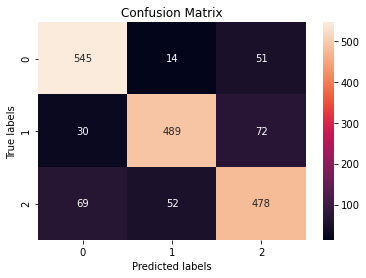

In [29]:
# getting the classfication report
print(classification_report(y3test, y_pred))
cm = confusion_matrix(y3test, y_pred)

# potting graphical confusion matrix on the test data 
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.show()

In [ ]:
# GRID search with 10 k-fold cross validation
print("Hyper Parameter Tuning with Folds")
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X3):
    # split data
    X_train, X_test = X3[train_ix, :], X3[test_ix, :]
    y_train, y_test = Y3[train_ix], Y3[test_ix]
    # configure the cross-validation procedure of Grid Search
    cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
    # define the model
    model = SVC()
    # define search space
    space = dict()
    space['C'] = [0.1,1]
    space['gamma'] = [0.1,1]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))

In [ ]:
print(classification_report(y_test, yhat))

In [ ]:
print('The score on FTR TEST DATA with Hyper Tuning') 
# summarize the estimated performance of the model
print(mean(outer_results))

In [33]:
sns.set(style="whitegrid", color_codes=True)

In [40]:
outer_results1 = np.around(outer_results,3)
outer_results1

array([0.878, 0.893, 0.87 , 0.872, 0.901, 0.887, 0.899, 0.881, 0.871,
       0.881])

In [164]:
df_plot = pd.DataFrame({'Fold' : np.arange(1,11)})

In [165]:
df_plot['Accuracy'] = outer_results1
df_plot

,Fold,Accuracy
0,1,0.878
1,2,0.893
2,3,0.870
3,4,0.872
4,5,0.901
5,6,0.887
6,7,0.899
7,8,0.881
8,9,0.871
9,10,0.881


In [151]:
#for Mean Line
x = [1,10,-1]
y_mean = [mean(outer_results)]*len(x)

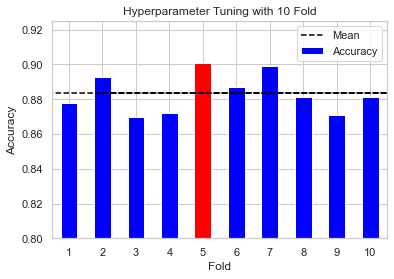

In [155]:
clrs = ['blue' if (x < max(df_plot['Accuracy'])) else 'red' for x in df_plot['Accuracy'] ]
ax = df_plot.plot.bar(x='Fold', y='Accuracy', rot=0, color=clrs)
ax.plot(x,y_mean, label='Mean', linestyle='--', color = 'black')
ax.set_ylim(0.80,0.925)
ax.set_ylabel('Accuracy')
ax.set_title('Hyperparameter Tuning with 10 Fold')
legend = ax.legend(loc='upper right')

In [13]:
records = df.shape[0]
features = df.shape[1]

In [14]:
print(records)
print(features)

9000
6114


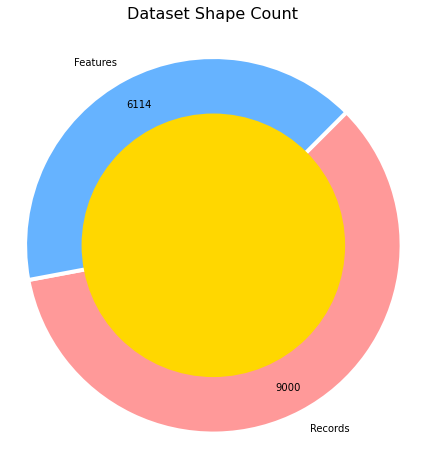

In [28]:
#To display actual values instead of percentages
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

#ploting
from matplotlib.pyplot import pie, axis, show

sums = [records,features]
labels = ['Records', 'Features']

myexplode = (0, 0)
mycolors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sums, labels=labels, autopct = autopct_format(sums), shadow=False, startangle=45, colors = mycolors, explode = myexplode,\
        counterclock=False, wedgeprops={'edgecolor': 'white', 'linewidth': 4},textprops={'fontsize': 10},\
        pctdistance=0.85, radius=1)

centre_circle = plt.Circle((0,0),0.70,fc='Gold')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Dataset Shape Count', fontsize=16, pad=20)
plt.show()